In [5]:
import cv2

In [19]:
!pip install streamlit
!pip install opencv-python-headless
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.1 MB/s eta 0:00:00


In [3]:
img = cv2.imread("images.jpeg")   # replace with your file name

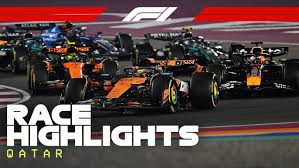

In [7]:
#show image
cv2_imshow(img)

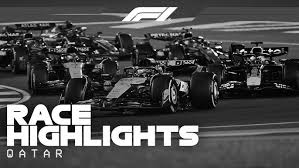

In [8]:
#convert to b/w
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [9]:
#show properties
print("Shape (H, W, C):", img.shape)
print("Size:", img.size)
print("Data type:", img.dtype)


Shape (H, W, C): (168, 299, 3)
Size: 150696
Data type: uint8


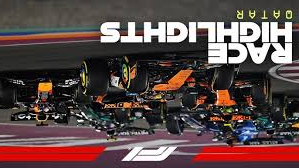

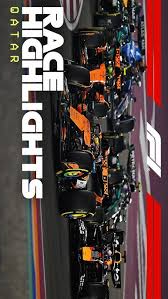

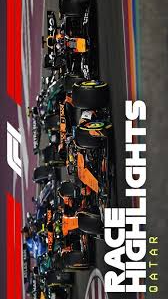

In [10]:
#rotation
rot_180 = cv2.rotate(img, cv2.ROTATE_180)
rot_90  = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
rot_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2_imshow(rot_180)
cv2_imshow(rot_90)
cv2_imshow(rot_270)

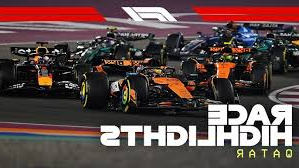

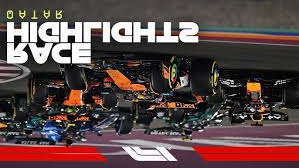

In [11]:
#mirrro image
flip_horizontal = cv2.flip(img, 1)  # left <-> right
flip_vertical   = cv2.flip(img, 0)  # up <-> down

cv2_imshow(flip_horizontal)
cv2_imshow(flip_vertical)


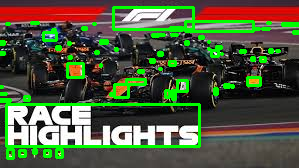

Number of objects detected: 64


In [12]:
#show object
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_objects = img.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_objects, (x, y), (x+w, y+h), (0,255,0), 2)

cv2_imshow(img_objects)
print("Number of objects detected:", len(contours))


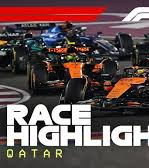

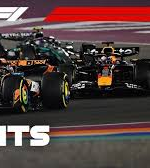

In [13]:
#cut image vertically
h, w = img.shape[:2]

left_half  = img[:, :w//2]
right_half = img[:, w//2:]

cv2_imshow(left_half)
cv2_imshow(right_half)


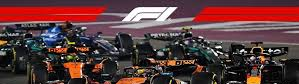

In [15]:
#cut horizontally 50-50
top_half = img[:h//2, :]
bottom_half = img[h//2:, :]

cv2_imshow(top_half)



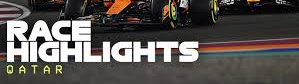

In [16]:
cv2_imshow(bottom_half)

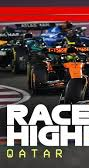

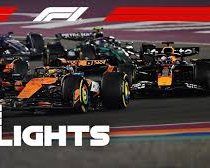

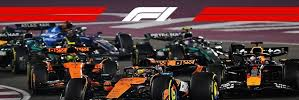

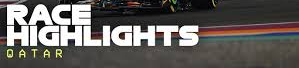

In [17]:
v_ratio = 0.3
h_ratio = 0.6

v_cut = int(w * v_ratio)
h_cut = int(h * h_ratio)

vertical_30 = img[:, :v_cut]
vertical_70 = img[:, v_cut:]

horizontal_60 = img[:h_cut, :]
horizontal_40 = img[h_cut:, :]

cv2_imshow(vertical_30)
cv2_imshow(vertical_70)
cv2_imshow(horizontal_60)
cv2_imshow(horizontal_40)


Grid 1


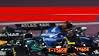

Grid 2


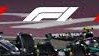

Grid 3


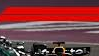

Grid 4


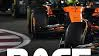

Grid 5


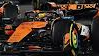

Grid 6


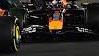

Grid 7


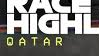

Grid 8


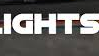

Grid 9


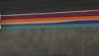

In [18]:
#grid
rows = 3
cols = 3

grid_h = h // rows
grid_w = w // cols

num = 1
for r in range(rows):
    for c in range(cols):
        grid = img[r*grid_h:(r+1)*grid_h, c*grid_w:(c+1)*grid_w]
        print("Grid", num)
        cv2_imshow(grid)
        num += 1
